<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-manunu93/blob/main/4_Copia_de_TADM2022_2a_Razonamiento_Borroso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sistema Borroso
 

Vamos a crear un sistema de control borroso que modela cómo se puede evaluar la capacidad de un cliente para pedir un préstamo. Cuando se tiene que dar un préstamos se considerará la edad del peticionario, la cantidad del préstamos, la duración y los pagos en los que se divide. FInalmente nos dará una puntuación de 0 a 10 al préstamo. 


## Preliminares

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

* instalación de scikit-fuzzy

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 21.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e32ba585e7fb50d53019e6f50b66dbc2a6bd2dbf20b4061917f9f34ceb62c8a0
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


* importación de librerías


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##  Sistema Borroso

Definimos los Antecedentes
* Edad del cliente
* pagos mensuales
* Cantidad del Préstamo
* Duración de la Amortización (min: 12 max 60)



Para el razonamiento borroso se pueden crear tantas categorías como se desee en función de analisis que se vaya a realizar, hay que ajustar las puntuación para que tenga sentido para despues analizar

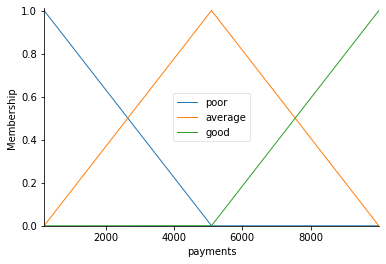

In [ ]:
#
payments = ctrl.Antecedent(np.arange(200, 10000, 1), 'payments')


payments.automf(3) # le damos un valor para obtener los distintos grupos, poor empieza en 1 si el valor es 0 y llega hasta cero cuando los payment son 5000, averge empieza en 0 - 0 y va aumentando en
# su pico más alto cuando llega a la mitad de la distribucción y luego empieza a decrecer, y por ultimo la categoría good empiza desde la mitad de la distribucción y aumenta hasta llegar al máximo, el cual es 1
payments.view()

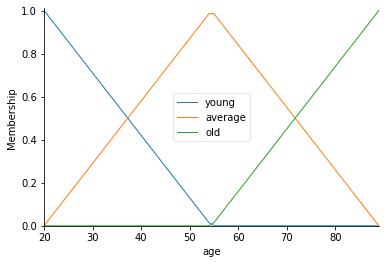

In [ ]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

In [ ]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

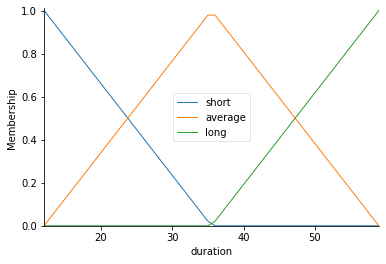

In [ ]:
duration = ctrl.Antecedent(np.arange(12, 60, 1), 'duration')
duration.automf(3, names=["short", "average", "long"])
duration.view()

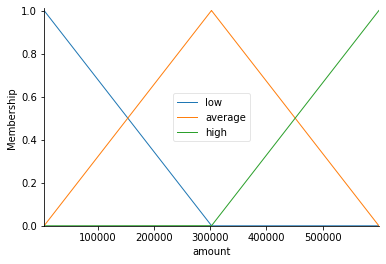

In [ ]:
amount = ctrl.Antecedent(np.arange(5000, 600000, 1), 'amount')
amount.automf(3,  names = ["low","average","high"])
amount.view()

Definimos el consecuente

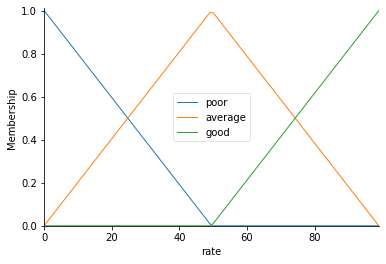

In [ ]:
rate = ctrl.Consequent(np.arange(0, 100, 1), 'rate')
rate.automf(3)
rate.view()


## Reglas borrosas
-----------
Ahora, para hacer estos triángulos útiles, definimos la *relación borrosa*
entre las variables de entrada y salida. Para el ejemplo vamos a considerar las siguientes reglas simples (para hacer un sistema completo se necesitarían algunas más) 

1. Si la duración y la cantidad son pequeñas entonces la calificación será buena.
2. Si la cantidad es alta, los pagos pequeños y la duración alta entonces la calificación será *pobre*
3. Si la cantidad es media y los pagos también medios si la edad del cliente es baja entonces el rating es medio. 

La clave de estas reglas es que son borrosas, es decir que expresamos la información de forma lingüística intentando manejar la incertidumbre inherente. 



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0606c27c90>)

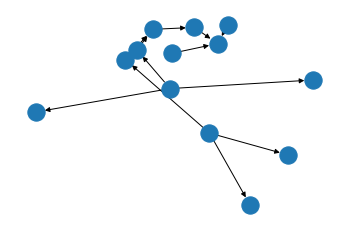

In [ ]:

rule1 = ctrl.Rule(duration['short'] & amount['low'], rate['good'])
rule2 = ctrl.Rule(amount['high'] & payments['average'] & duration["long"], rate["poor"])
rule3 = ctrl.Rule(age['young'] & amount['average'], rate['average'])

rule1.view()

Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control vía:

In [ ]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
rating_ctrl.graph

Con el fin de simular este sistema de control, crearemos un
"Sistema de Control y Simulación".  Este objeto que representa al controlador aplicado a un conjunto específico de circunstancias.  

In [ ]:
rating = ctrl.ControlSystemSimulation(rating_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método *compute*.  

Supongamos que un cliente de 40 años va a pedir un préstamos a 12 años con pagos de 2000 y una cantidad de 300000

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000


44.52999446644107


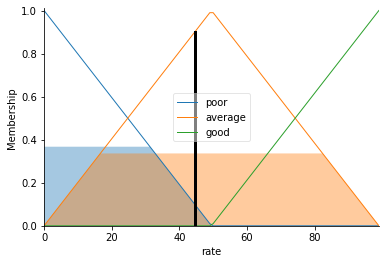

In [ ]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Interpretación:

Según las características del sujeto introducido y de las condiciones del préstamo nos devuelve un rating del 44.53 esto se traduce en lo "bueno" que es conceder el préstamo

In [ ]:
rating.input['age'] = 25
rating.input['duration'] = 80
rating.input['payments'] = 1500
rating.input['amount'] = 800000


21.64009133109642


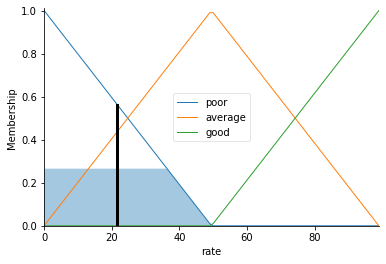

In [ ]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

si se comprara este gráfico con el anterior es que con una menor edad, mayor duración, menos pagos y más importe, el rating es mucho peor y se podría entender como que las condiciones o las garantias que presenta son peores en un marco financiero y de solvencia

44.52999446644107


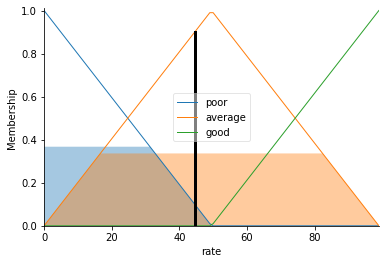

In [ ]:
#Comparación 2:

rating.input['age'] = 20
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

44.52999446644107


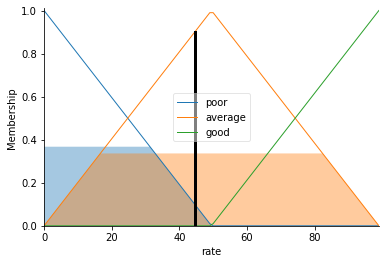

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

35.84447618067917


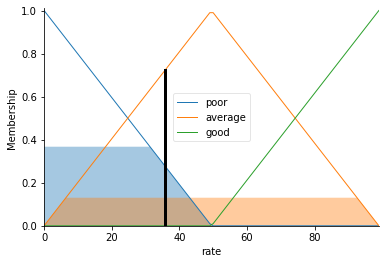

In [ ]:
rating.input['age'] = 50
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

20.54956371806847


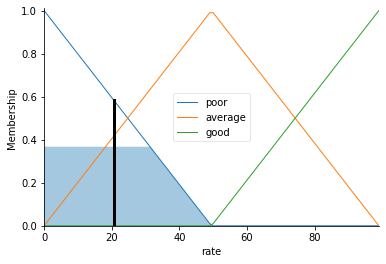

In [ ]:
rating.input['age'] = 70
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

20.54956371806847


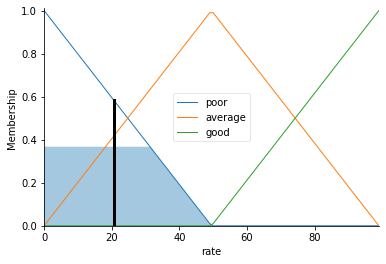

In [ ]:
rating.input['age'] = 80
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

65.81308489688475


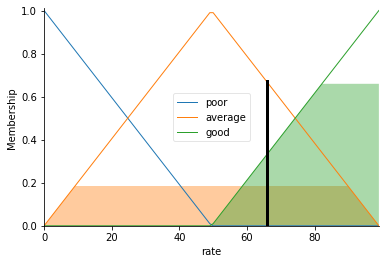

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 20
rating.input['payments'] = 5000
rating.input['amount'] = 60000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

81.06981161270663


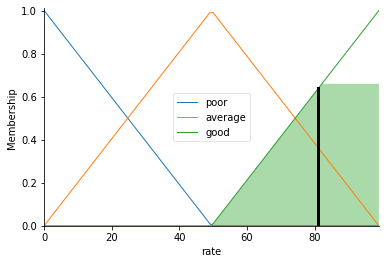

In [ ]:
rating.input['age'] = 80
rating.input['duration'] = 20
rating.input['payments'] = 5000
rating.input['amount'] = 60000

rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)